<a href="https://colab.research.google.com/github/youcefpy/pytorch-learning/blob/main/Hello_pyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [ ]:
#creating a Model class that inherit from nn.Model
class Model(nn.Module) :

  def __init__(self,input_freatures=4,h1=8,h2=7,output = 3):
    super().__init__()#init the nn.Module
    self.fc1= nn.Linear(input_freatures,h1)
    self.fc2= nn.Linear(h1,h2)
    self.out= nn.Linear(h2,output)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [ ]:
model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=7, bias=True)
  (out): Linear(in_features=7, out_features=3, bias=True)
)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:

url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
data_frame = pd.read_csv(url)

In [ ]:
data_frame.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
data_frame['variety'] = data_frame['variety'].replace('Setosa',0.0)
data_frame['variety'] = data_frame['variety'].replace('Versicolor',1.0)
data_frame['variety'] = data_frame['variety'].replace('Virginica',2.0)


In [ ]:
data_frame

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
#train and test set, X and y
X = data_frame.drop('variety',axis=1)
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = data_frame['variety']

In [ ]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: variety, Length: 150, dtype: float64

In [ ]:
# converting X and y to a numpy array
X = X.values
y = y.values

In [ ]:
type(X)

numpy.ndarray

In [ ]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [ ]:
#Convert X features to a float Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
# Convert Y target to tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
model = Model()
#set the criterion fo the model to measure the error
criterion = nn.CrossEntropyLoss()
#chose adam optimizer, lr =
optimizer  = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
#trainig our model
#define how many epochs we need

epochs = 100
losses = []

for i in range(epochs):
  y_predict = model.forward(X_train)

  #calculate the loss y_predict vs y_train

  loss = criterion(y_predict,y_train)

  losses.append(loss.detach().numpy())

  #print

  if i % 10 == 0:
    print(f'epoch : {i}, loss => {loss}')

  # do back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()





epoch : 0, loss => 1.1392483711242676
epoch : 10, loss => 0.8987233638763428
epoch : 20, loss => 0.6385974884033203
epoch : 30, loss => 0.45305678248405457
epoch : 40, loss => 0.3263065218925476
epoch : 50, loss => 0.2101912945508957
epoch : 60, loss => 0.13740147650241852
epoch : 70, loss => 0.10319039970636368
epoch : 80, loss => 0.0865231603384018
epoch : 90, loss => 0.07757174223661423


Text(0.5, 0, 'epoch')

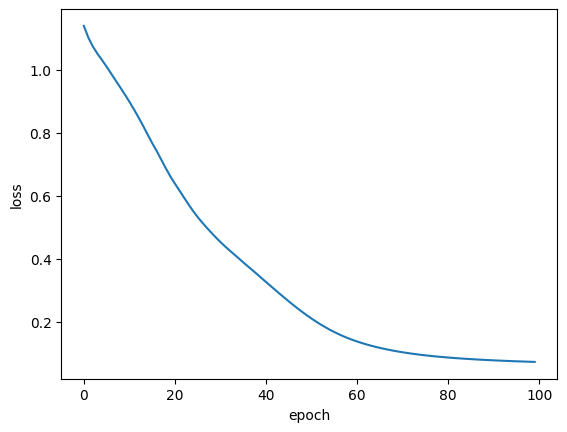

In [ ]:
# plot
plt.plot(range(epochs),losses)
plt.ylabel("loss")
plt.xlabel("epoch")

In [ ]:
#Evaluate the model on the test Data set
with torch.no_grad(): #turn off the back propagation
  y_evel = model.forward(X_test)
  loss = criterion(y_evel,y_test)


In [ ]:
loss
y_test

tensor([1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
        2, 1, 1, 2, 0, 2])

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f' {i+1}.) {y_val}\t {y_test[i]}')


    #correct or not

    if y_val.argmax().item()==y_test[i]:
      correct +=1
      print(f"we have {correct} correct from {len(y_test)}")


 1.) tensor([-2.0041,  4.8690,  0.7774])	 1
we have 1 correct from 30
 2.) tensor([ 17.4858,  11.1795, -20.5912])	 0
we have 2 correct from 30
 3.) tensor([-3.8601,  4.6292,  2.7347])	 1
we have 3 correct from 30
 4.) tensor([-10.7736,   2.7819,  10.3884])	 2
we have 4 correct from 30
 5.) tensor([ 14.2130,   9.8140, -16.9413])	 0
we have 5 correct from 30
 6.) tensor([-8.7261,  3.5419,  7.9583])	 2
we have 6 correct from 30
 7.) tensor([ 1.1711,  5.3783, -2.5886])	 1
we have 7 correct from 30
 8.) tensor([ 19.3477,  12.3391, -22.7614])	 0
we have 8 correct from 30
 9.) tensor([ 18.7452,  11.9575, -22.0531])	 0
we have 9 correct from 30
 10.) tensor([ 12.6847,   8.3825, -15.0518])	 0
we have 10 correct from 30
 11.) tensor([ 19.5895,  12.4918, -23.0466])	 0
we have 11 correct from 30
 12.) tensor([-10.9498,   3.2373,  10.3015])	 2
we have 12 correct from 30
 13.) tensor([ 16.8759,  10.7665, -19.8752])	 0
we have 13 correct from 30
 14.) tensor([-1.4810,  5.9814, -0.0079])	 1
we have 14

In [ ]:
new_iris = torch.tensor([5.9,3.0,5.1,1.8])
with torch.no_grad():
  print(model(new_iris))

tensor([-7.2324,  3.9147,  6.3474])


In [ ]:
#save the model : we save the model with the function save taking 2 arguments (model,model_name.pt)
torch.save(model.state_dict(),"iris_model.pt")

In [ ]:
#load the saved model :
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [ ]:
#check the loaded model :
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=7, bias=True)
  (out): Linear(in_features=7, out_features=3, bias=True)
)